In [1]:
import numpy as np
import logging

class UnPadreVariosHijos:

    def __init__(self, iterations=10, n_children=3):
        self.iter = iterations
        self.n_children = n_children
        # Generate random solutions. For multiple parents and multiple variables, 
        self.parent = np.random.uniform(low=0.0, high=5.0, size=None)

        # Save the best initial solution. Since there is only one parent, no selection is required.
        self.best_iter = [self.parent]
        # Save the evaluation of the best solution.
        self.evaluaciones = [self.eval_func(self.parent)]

        print()
        # Get the logger.
        self.logger = logging.getLogger(__name__)
        self.logger.info('Initializing algorithm with parent {} and {} children'.format(self.parent, self.n_children))

    def eval_func(self, x):
        """
        Function to evaluate a solution.
        """
        return x**3-2*x**2+1

    def evaluate(self, children):
        """
        Function that takes multiple solutions and evaluates each of them.
        """
        return list(map(self.eval_func, children))

    def mutation(self):
        """
        Function that generates childrens from a single parent. 
        """
        children = self.parent + (-1) ** np.random.randint(0, 2) * np.random.random_sample(size=self.n_children)
        return np.clip(children, 0, 5)

    def run(self):
        counter = 0
        for _ in range(self.iter):
            # Generate children from one parent.
            children = self.mutation()
            self.logger.debug('Children are {}.'.format(children))
            # Evaluate all children.
            evaluations = self.evaluate(children)
            self.logger.debug('Evaluations are {}.'.format(evaluations))
            # Select the children with the lowest evaluation.
            self.parent = children[np.argmin(evaluations)]
            # Save the best solution of the iteration.
            self.best_iter.append(self.parent)

            # Save the best evaluation of the iteration.
            self.evaluaciones.append(self.eval_func(self.parent))
            self.logger.info('New Parent is {} with f(x)={}.'.format(self.parent, self.evaluaciones[-1]))
            counter += 1

        return self.best_iter












              algoritmo  experimento  iteracion         x  evaluacion  \
0    UnPadreVariosHijos            1          0  1.661438    0.065442   
1    UnPadreVariosHijos            1          1  1.158169   -0.129195   
2    UnPadreVariosHijos            1          2  1.022799   -0.022267   
3    UnPadreVariosHijos            1          3  1.350444   -0.184595   
4    UnPadreVariosHijos            1          4  1.669998    0.079659   
..                  ...          ...        ...       ...         ...   
205  UnPadreVariosHijos           10         16  1.087728   -0.079356   
206  UnPadreVariosHijos           10         17  1.338529   -0.185131   
207  UnPadreVariosHijos           10         18  1.349300   -0.184671   
208  UnPadreVariosHijos           10         19  1.514631   -0.113489   
209  UnPadreVariosHijos           10         20  1.667286    0.075108   

        menor  
0    0.065442  
1   -0.129195  
2   -0.129195  
3   -0.184595  
4   -0.184595  
..        ...  
2

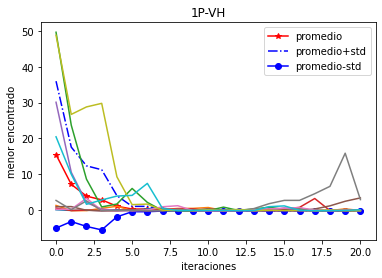

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.ERROR, format='%(asctime)s -%(levelname)s - %(funcName)s -  %(message)s')

logging.getLogger("matplotlib").setLevel(logging.WARNING)

df_experimentos = pd.DataFrame()
experimentos = 10

def poner_menor(row):
    df.at[row.name, 'menor'] = min(row['evaluacion'], df.iloc[row.name - 1].menor)
    return None

for experimento in range(1, experimentos + 1):
    algoritmo = UnPadreVariosHijos(iterations=20, n_children=4)
    mejores = algoritmo.run()

    # You can access all variables from a class by using the class.name_of_variable
    evaluaciones = algoritmo.evaluaciones
    cantidad = len(mejores)
    logger = logging.getLogger()
    logger.info('Experimento ' + str(experimento))
    logger.info('Cantidad de soluciones {}.'.format(cantidad))
    logger.info('Cantidad de evaluaciones {}.'.format(len(evaluaciones)))

    # Create a dataframe. It is like an excel spreadsheet.
    df = pd.DataFrame(
        {'algoritmo':[algoritmo.__class__.__name__] * cantidad,
         'experimento':[experimento]*cantidad,
         'iteracion':list(range(0, cantidad)),
         'x':mejores,
         'evaluacion':evaluaciones}
    )
    
    # The first row has the lowest value so far.
    df.at[0, 'menor'] = df.loc[0]['evaluacion']

    # For each row, compare the evaluation of the current row and the previous smallest value to find which is smaller.
    df.loc[1:].apply(lambda row: poner_menor(row), axis=1)

    logger.info('\n'+df.to_string())
    df_experimentos = df_experimentos.append(df)

df_experimentos.reset_index(drop=True, inplace=True)
print(df_experimentos)

# Calculate the average best evaluation per iteration.
resultados = df_experimentos.groupby('iteracion').agg({'menor': ['mean', 'std']})

print(resultados)

promedios = resultados['menor']['mean'].values
std = resultados['menor']['std'].values
# Plot the average best evaluation for all experiments

plt.plot(promedios, color='red', marker='*')
plt.plot(promedios+std, color='b', linestyle='-.')
plt.plot(promedios-std, color='b', marker='o')
plt.xlabel('iteraciones')
plt.ylabel('menor encontrado')
plt.legend(['promedio', 'promedio+std','promedio-std'])
plt.title('1P-VH')
# Plot the evaluations for all experiments
for experimento in range(1, experimentos + 1):
  plt.plot(df_experimentos[df_experimentos.experimento==experimento].evaluacion.values)
plt.show()
